<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Neda Fallah 
### Student Number : 98100226
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [5]:
#TODO
#import the dataset
heart_dt= pd.read_csv('/content/heart_disease.csv')
#seperate
X=heart_dt.drop(columns='target')
y= heart_dt['target']
#replace 0 with -1
y.replace(to_replace = 0, value = -1, inplace=True)
#I checked with the isna() method if we have any NaN and there were none, hence no reason to fillna
#split to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state=42)

### Adaboost Algorithm Implementation (40 points)

In [57]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    #TODO : Calculate the weighted error of a weak classifier.//
    error = sum(w*(np.not_equal(y, y_pred)).astype(int))/sum(w) 
    return error


def calculate_alpha(error):
    #TODO : Calculate the weight of a weak classifier.
    alpha = 0.5 * np.log((1-error)/error)
    return alpha


def update_weights(w, alpha, y, y_pred):
    #TODO : Update weights after a boosting iteration.
    res = w * np.exp(alpha * (y != y_pred))
    return res
  
    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.M = None
        self.G_M = []
        self.training_errors = []
        self.prediction_errors = []

    def fit(self, X, y, M):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M
        #self.y_preds = []

        for m in range(0, M):
            
            # Set weights
            if m == 0:
                #TODO set initial weights to 1/n for all n samples
                 n_samples = len(y)
                 w= np.full(n_samples, (1/n_samples))
                 # w_i = np.ones(len(y)) * 1 / len(y) 
            else:
                #TODO
             w=update_weights(w, alpha, y, y_pred)
               
                          
          
          
            
            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            #TODO
            G_m = DecisionTreeClassifier(max_depth = 1)    
            G_m.fit(X, y, sample_weight = w)
            y_pred = G_m.predict(X)
            self.G_M.append(G_m)
            #self.y_preds.append(y_pred)

            # 2. Calculate error of this weak classifier and save it to list of trainingterrors.
            #TODO
            error = calculate_error(y, y_pred, w)
            self.training_errors.append(error)

            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            #TODO
            alpha = calculate_alpha(error)
            self.alphas.append(alpha)
          
          
            #assert len(self.G_M) == len(self.alphas) 



    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred



        

### Training and Evaluation (20 points)

In [58]:
#TODO : Fit model
clf = AdaBoost()
clf.fit(X_train, y_train, M=500)

#TODO : Predict on test data
y_pred = clf.predict(X_test)
#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fscore= f1_score(y_test, y_pred)
print(" accuracy:", acc,
      '\n precision:', precision,
      '\n recall:', recall,
      '\n fscore:', fscore)

 accuracy: 0.848780487804878 
 precision: 0.8157894736842105 
 recall: 0.9029126213592233 
 fscore: 0.8571428571428571


In [51]:
#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

clf2 = AdaBoostClassifier(n_estimators=500, random_state=0)
clf2.fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)

acc = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
fscore= f1_score(y_test, y_pred2)
print(" accuracy:", acc ,
      '\n precision:', precision,
      '\n recall:', recall,
      '\n fscore:', fscore)

 accuracy: 0.9463414634146341 
 precision: 0.9693877551020408 
 recall: 0.9223300970873787 
 fscore: 0.9452736318407962


### Early Stopping (15 points)

In [ ]:
#TODO : Calculate validation error for different number of estimators 

In [ ]:
#TODO : Plot validation error versus number of estimators figure.

In [ ]:
#TODO : Print the best number for estimators and minimum value for validation error.

### Weighted Error (10 points)

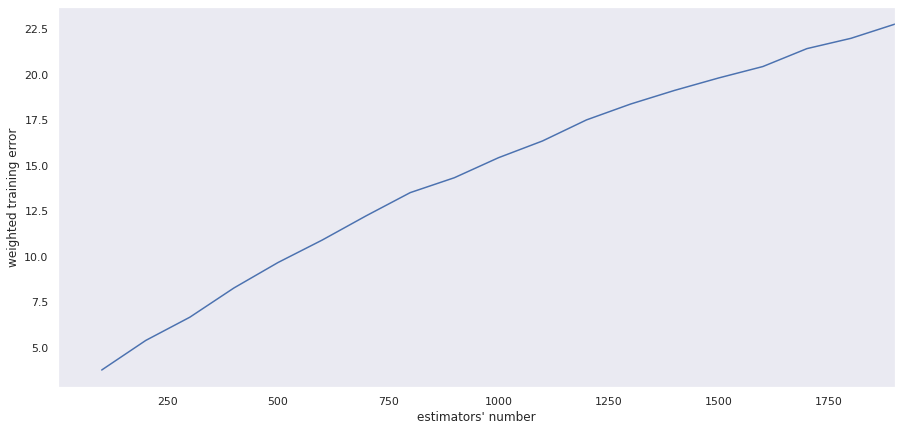

In [60]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.
from sklearn.metrics import mean_squared_error

result={}
for m in range(100, 2000, 100):
  clf2 = AdaBoost()
  clf2.fit(X_train, y_train, m)
  y_pred3 = clf2.predict(X_test)
  result[m]=np.sum(np.asarray(clf2.training_errors) * np.asarray(clf2.alphas))


plt.figure(figsize=(15, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(result.keys()), y=list(result.values()))
plt.xlabel("estimators' number")
plt.ylabel("weighted training error")
ax.set_xlim([1, max(list(result.keys()))])
plt.show()

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

In [19]:
print("due to overfitting, making the model overly complicated by increasing the number of estimators will result in more errors")

0
1
2
3
4
5
